# File I/O

In [4]:
import numpy as np

## Comma-separated values (CSV)

A very common file format for data files are the comma-separated values (CSV), or related format such as TSV (tab-separated values). To read data from such file into Numpy arrays we can use the `numpy.genfromtxt` function. For example, 

In [3]:
!head files/stockholm_td_adj.dat

1800  1  1    -6.1    -6.1    -6.1 1
1800  1  2   -15.4   -15.4   -15.4 1
1800  1  3   -15.0   -15.0   -15.0 1
1800  1  4   -19.3   -19.3   -19.3 1
1800  1  5   -16.8   -16.8   -16.8 1
1800  1  6   -11.4   -11.4   -11.4 1
1800  1  7    -7.6    -7.6    -7.6 1
1800  1  8    -7.1    -7.1    -7.1 1
1800  1  9   -10.1   -10.1   -10.1 1
1800  1 10    -9.5    -9.5    -9.5 1


In [7]:
data = np.genfromtxt('files/stockholm_td_adj.dat')

In [8]:
data.shape

(77431, 7)

In [9]:
%matplotlib inline

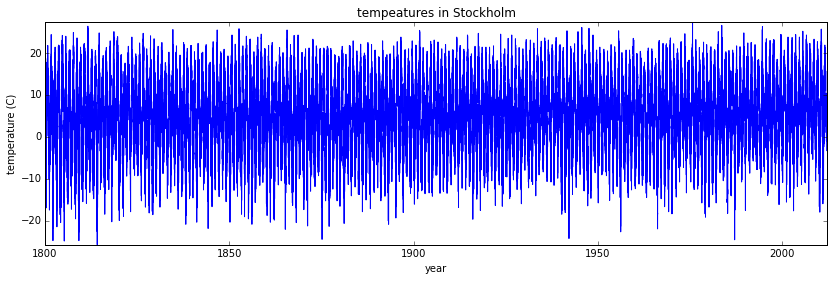

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14,4))
ax.plot(data[:,0]+data[:,1]/12.0+data[:,2]/365, data[:,5])
ax.axis('tight')
ax.set_title('tempeatures in Stockholm')
ax.set_xlabel('year')
ax.set_ylabel('temperature (C)');

* Using `numpy.savetxt` we can store a Numpy array to a file in CSV format:

In [12]:
M = np.random.rand(3,3)

M

array([[ 0.31317616,  0.20088394,  0.41316946],
       [ 0.7310281 ,  0.0648454 ,  0.65211665],
       [ 0.48175246,  0.95090269,  0.55600475]])

In [13]:
np.savetxt("files/random-matrix.csv", M)

In [15]:
!cat files/random-matrix.csv

3.131761644061283878e-01 2.008839378609001969e-01 4.131694624921022907e-01
7.310281040069959158e-01 6.484540108140146586e-02 6.521166476190490835e-01
4.817524584523095177e-01 9.509026891895464573e-01 5.560047526405588192e-01


In [17]:
np.savetxt("files/random-matrix.csv", M, fmt='%.5f')  # fmt specifies the format

!cat files/random-matrix.csv

0.31318 0.20088 0.41317
0.73103 0.06485 0.65212
0.48175 0.95090 0.55600


## Numpy's native file format

* Useful when storing and reading back numpy array data. 

* Use the functions `np.save` and `np.load`:

### `np.save`

In [19]:
np.save("files/random-matrix.npy", M)

!file files/random-matrix.npy

files/random-matrix.npy: data


### `np.load`

In [22]:
a = np.load("files/random-matrix.npy")
print(a, a.dtype)

[[ 0.31317616  0.20088394  0.41316946]
 [ 0.7310281   0.0648454   0.65211665]
 [ 0.48175246  0.95090269  0.55600475]] float64


## Matlab Users

* Numpy can load and save native MATLABÂ® files:

In [42]:
a = np.array([[10*j+i for i in range(6)] for j in range(6)])

In [43]:
a

array([[ 0,  1,  2,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33, 34, 35],
       [40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

In [45]:
from scipy import io as spio
spio.savemat('files/test.mat', {'a': a}, oned_as='row')  # savemat expects a dictionary
data = spio.loadmat('files/test.mat')
data['a']

array([[ 0,  1,  2,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33, 34, 35],
       [40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

# Data processing

Often it is useful to store datasets in Numpy arrays. Numpy provides a number of functions to calculate statistics of datasets in arrays. 

For example, let's calculate some properties data from the Stockholm temperature dataset used above.

In [24]:
# reminder, the tempeature dataset is stored in the data variable:
data.shape

(77431, 7)

### `np.mean`

In [25]:
# the temperature data is in column 3
np.mean(data[:,3])

6.1971096847515854

The daily mean temperature in Stockholm over the last 200 year so has been about 6.2 C.

### standard deviations and variance: `np.std` and `np.var`

In [26]:
np.std(data[:,3]), np.var(data[:,3])

(8.2822716213405734, 68.596023209663414)

### `np.min` and `np.max`

In [27]:
# lowest daily average temperature
data[:,3].min()

-25.800000000000001

In [28]:
# highest daily average temperature
data[:,3].max()

28.300000000000001

### `np.sum`, `np.prod`, and `np.trace`

In [29]:
d = np.arange(0, 10)
d

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [30]:
# sum up all elements
np.sum(d)

45

In [31]:
# product of all elements
np.prod(d+1)

3628800

In [32]:
# cummulative sum
np.cumsum(d)

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45])

In [33]:
# cummulative product
np.cumprod(d+1)

array([      1,       2,       6,      24,     120,     720,    5040,
         40320,  362880, 3628800])

In [35]:
# same as: diag(A).sum()
A = np.random.rand(4, 4)
np.trace(A)

2.9074994365376856

## Calculations with higher-dimensional data

When functions such as `min`, `max`, etc., is applied to a multidimensional arrays, it is sometimes useful to apply the calculation to the entire array, and sometimes only on a row or column basis. Using the `axis` argument we can specify how these functions should behave: 

In [38]:
M = np.random.rand(3,3)
M

array([[ 0.3388712 ,  0.93676276,  0.99686342],
       [ 0.93683332,  0.86343705,  0.96642876],
       [ 0.82354196,  0.77224646,  0.63881904]])

In [39]:
# global max
M.max()

0.9968634239465769

In [40]:
# max in each column
M.max(axis=0)

array([ 0.93683332,  0.93676276,  0.99686342])

In [41]:
# max in each row
M.max(axis=1)

array([ 0.99686342,  0.96642876,  0.82354196])

Many other functions and methods in the `array` and `matrix` classes accept the same (optional) `axis` keyword argument.